# Pet Adoption Analysis

1. What is the overall adoption rate of pets in the dataset?
2. Do adoption rates vary by pet type (dog vs. cat)?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Resources/pet_adoption_data.csv'
data = pd.read_csv(file_path)
data.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


## Overall Adoption Rate

In [3]:
# Calculate overall adoption rate
overall_adoption_rate = data['AdoptionLikelihood'].mean() * 100
print(f'Overall adoption rate: {overall_adoption_rate:.2f}%')

Overall adoption rate: 32.84%


## Adoption Rate by Pet Type

In [4]:
# Calculate adoption rate by pet type
adoption_rate_by_pet_type = data.groupby('PetType')['AdoptionLikelihood'].mean() * 100
adoption_rate_by_pet_type

PetType
Bird      30.184805
Cat       28.712871
Dog       46.360153
Rabbit    25.354970
Name: AdoptionLikelihood, dtype: float64

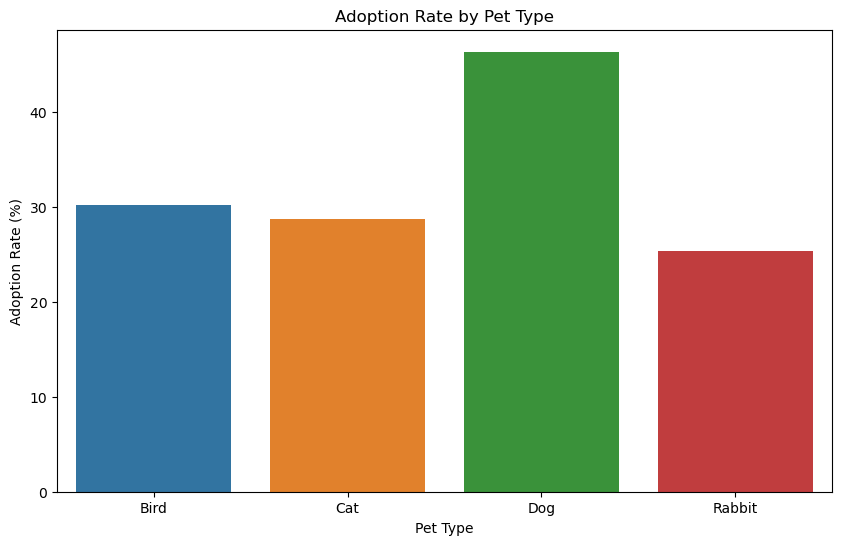

In [5]:
# Plot adoption rate by pet type
plt.figure(figsize=(10, 6))
sns.barplot(x=adoption_rate_by_pet_type.index, y=adoption_rate_by_pet_type.values)
plt.title('Adoption Rate by Pet Type')
plt.xlabel('Pet Type')
plt.ylabel('Adoption Rate (%)')
plt.show()

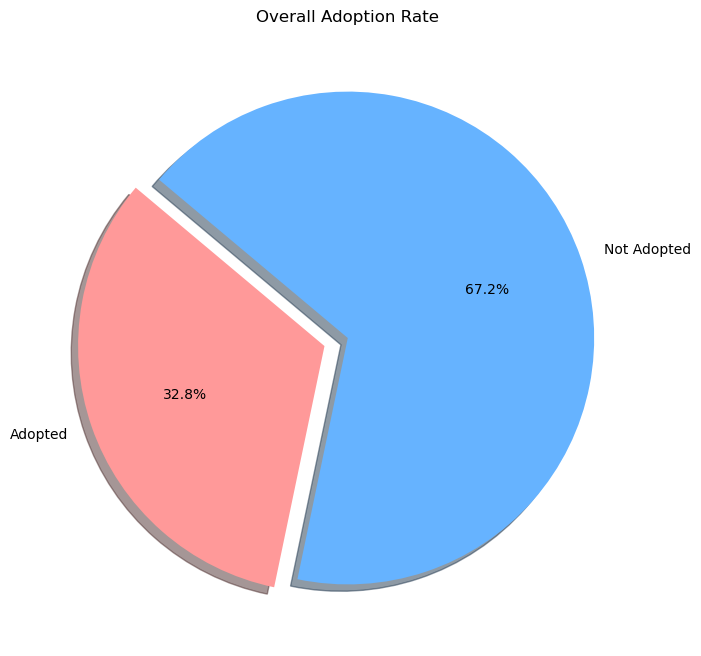

In [6]:
# Create a pie chart for overall adoption rate
labels = ['Adopted', 'Not Adopted']
sizes = [overall_adoption_rate, 100 - overall_adoption_rate]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Adoption Rate')
plt.show()